In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\CO2CARSBE.csv")

In [3]:
df.isna().sum()

ID                           0
Country                      0
VFN                        667
Mp                       56413
Mh                           0
Man                          0
MMS                     477252
Tan                          1
T                            2
Va                         155
Ve                         221
Mk                           0
Cn                           0
Ct                           0
Cr                           0
r                            0
m (kg)                       2
Mt                        1324
Enedc (g/km)            477252
Ewltp (g/km)               635
W (mm)                  477252
At1 (mm)                477252
At2 (mm)                477252
Ft                           0
Fm                           0
ec (cm3)                 93358
ep (KW)                   1703
z (Wh/km)               300057
IT                      225852
Ernedc (g/km)           477252
Erwltp (g/km)           225883
De                      477252
Vf      

In [4]:
col_to_del = ['MMS', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ernedc (g/km)', 'De', 'Vf']

In [5]:
# colonnes à supprimer car pas assez remplies (à valider, on peut peut être aussi inclure IT et Erwltp (g/km))
col_to_del.append('RLFI')

In [6]:
# colonnes à supprimer car doublons d'information
col_to_del.extend(('Mp', 'Mh', 'Man', 'Cr', 'm (kg)', 'Fm'))

In [7]:
# colonnes à supprimer car non pertinentes (infos administratives ou relatives au jeu de données en lui-même)
col_to_del.extend(('ID', 'Status', 'r', 'year', 'Tan', 'Va', 'Ve', 'Ct', 'Cr'))

In [8]:
# suppression des lignes concernant les véhicules électriques ainsi que des colonnes concernant ces véhicules uniquement
df = df[df['Ft'] != 'electric']
col_to_del.append('Electric range (km)')

In [9]:
# suppresion de colonnes sélectionnées
df = df.drop(col_to_del, axis=1)

In [10]:
# suppresion des doublons
df = df.drop_duplicates()

In [11]:
df.to_csv("C:\\Users\\Pc\\Downloads\\ReducedCO2CARSBE.csv", index=False)

In [12]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedCO2CARSBE.csv")

In [13]:
df.head(5)

,Country,VFN,T,Mk,Cn,Mt,Ewltp (g/km),Ft,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Date of registration,Fuel consumption,ech
0,BE,IP-MQB37SZ_A2_0550-WAU-1,GA,AUDI,Q2,1432.0,133.0,petrol,999.0,81.0,NaN,e13 29 37,2.07,2023-05-04,5.8,EURO 6 AP
1,BE,IP-JDA1MTGJT4B_000-VF1-1,SRD,DACIA,DUSTER,1457.0,126.0,lpg,999.0,67.0,NaN,e9 29 37,1.70,2023-03-03,7.8,6AP
2,BE,IP-MQB37SZ_A3_1035-WVW-1,A1,VOLKSWAGEN,T-ROC,1482.0,139.0,petrol,1498.0,110.0,NaN,e13 29,1.17,2023-05-17,6.2,EURO 6 AP
3,BE,IP-0000794-WBA-1,FMCA,MINI,JOHN COOPER WORKS,1546.0,157.0,petrol,1998.0,170.0,NaN,e24 29 37,2.00,2023-03-07,6.9,EURO 6 AP
4,BE,IP-HNA1M2PDB1A_000-VF1-1,RHN,RENAULT,AUSTRAL,1733.0,103.0,petrol,1199.0,96.0,NaN,e9 37,0.69,2023-12-01,4.6,6AP


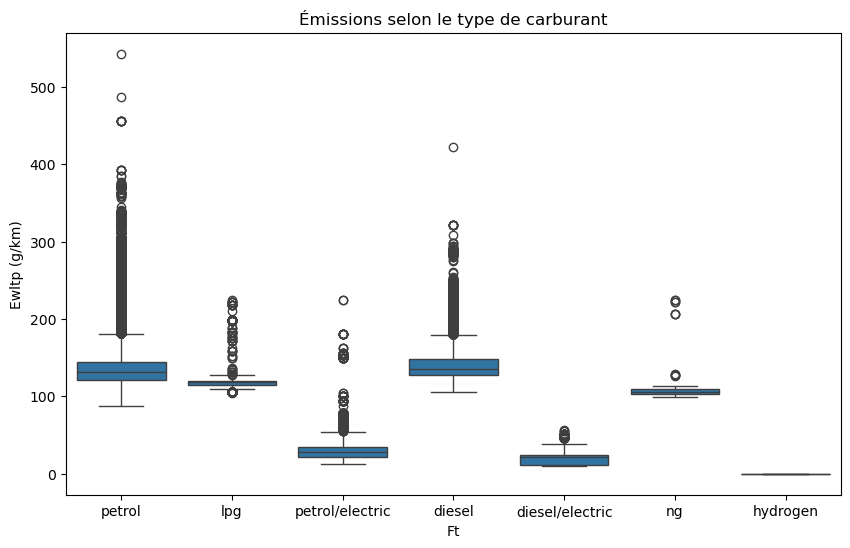

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedCO2CARSBE.csv")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ft', y='Ewltp (g/km)')
plt.title('Émissions selon le type de carburant')
plt.show()

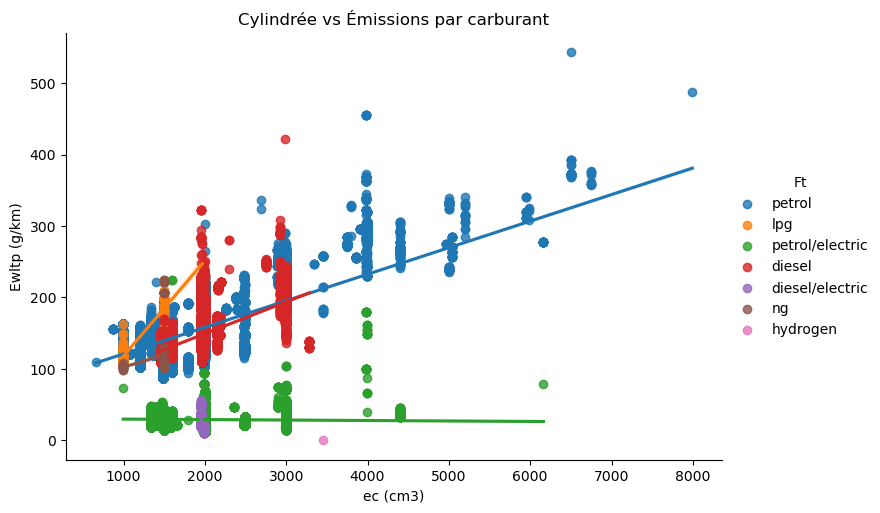

In [15]:
sns.lmplot(data=df, x='ec (cm3)', y='Ewltp (g/km)', hue='Ft', aspect=1.5)
plt.title('Cylindrée vs Émissions par carburant')
plt.show()

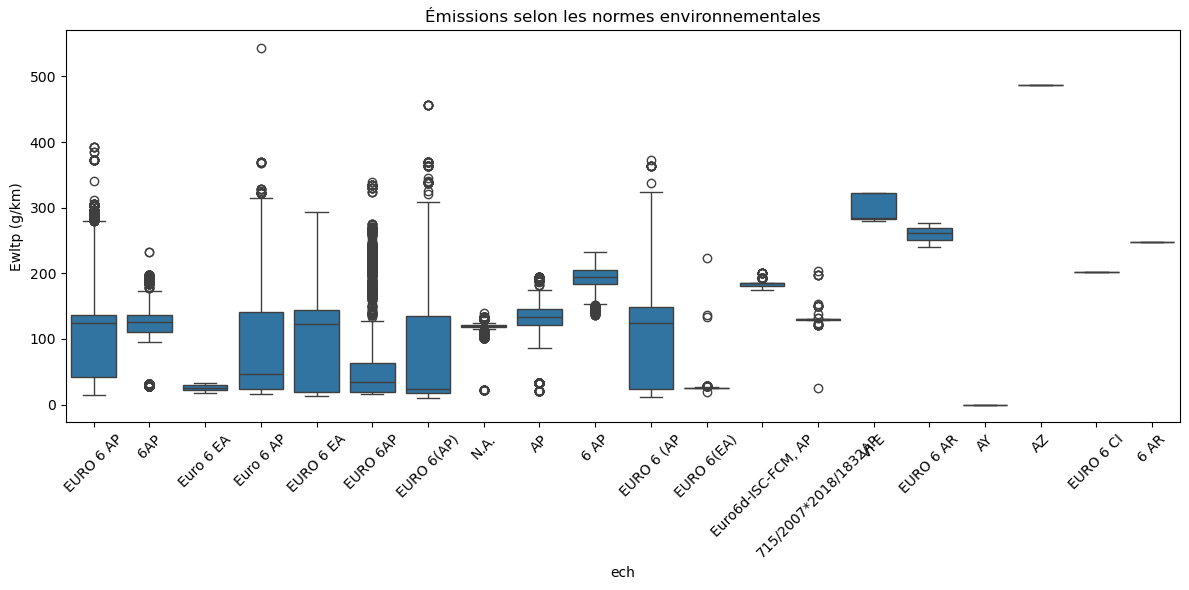

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ech', y='Ewltp (g/km)')
plt.xticks(rotation=45)
plt.title('Émissions selon les normes environnementales')
plt.tight_layout()
plt.show()

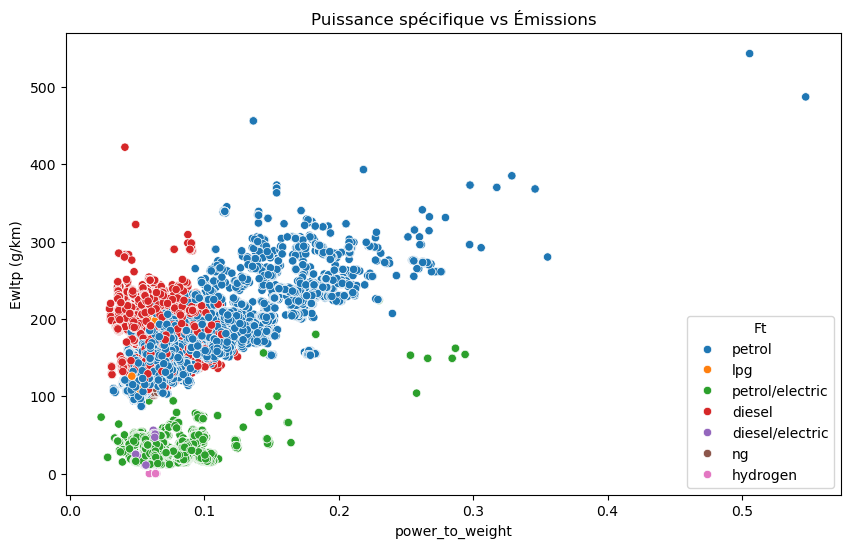

In [18]:
# Calcul de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='power_to_weight', y='Ewltp (g/km)', hue='Ft')
plt.title('Puissance spécifique vs Émissions')
plt.show()

In [19]:
top5_polluants = df.sort_values(by='Ewltp (g/km)', ascending=False).head(5)
top5_sobres = df.sort_values(by='Ewltp (g/km)', ascending=True).head(5)

print("Top 5 véhicules les plus émetteurs :")
print(top5_polluants[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])
print("\nTop 5 véhicules les plus sobres :")
print(top5_sobres[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])

Top 5 véhicules les plus émetteurs :
                  Mk                          Cn  Ewltp (g/km)      Ft
79800   ASTON MARTIN                    VALKYRIE         543.0  petrol
71224        BUGATTI  BUGATTI CHIRON SUPER SPORT         487.0  petrol
263730  MERCEDES AMG               AMG G 63 4X42         456.0  petrol
95579   MERCEDES AMG               AMG G 63 4X42         456.0  petrol
103948  MERCEDES AMG               AMG G 63 4X42         456.0  petrol

Top 5 véhicules les plus sobres :
             Mk            Cn  Ewltp (g/km)        Ft
129058   TOYOTA  TOYOTA MIRAI           0.0  hydrogen
205829    LOTUS         EMIRA           0.0  hydrogen
73984    TOYOTA  TOYOTA MIRAI           0.0  hydrogen
193414   TOYOTA  TOYOTA MIRAI           0.0  hydrogen
157811  HYUNDAI          NEXO           0.0  hydrogen


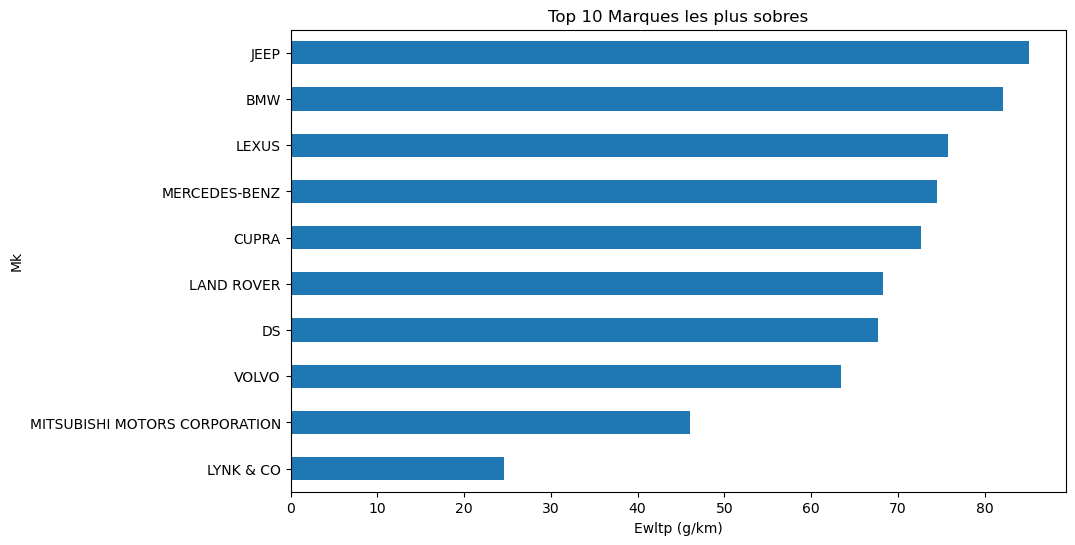

In [20]:
mean_emissions_by_brand = df.groupby('Mk')['Ewltp (g/km)'].mean().sort_values()
mean_emissions_by_brand.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Marques les plus sobres')
plt.xlabel('Ewltp (g/km)')
plt.show()

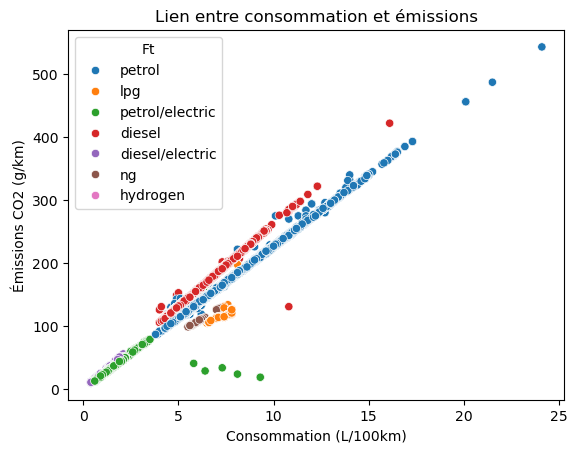

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip()

sns.scatterplot(data=df, 
                x='Fuel consumption', 
                y='Ewltp (g/km)', 
                hue='Ft')

plt.title('Lien entre consommation et émissions')
plt.xlabel('Consommation (L/100km)')
plt.ylabel('Émissions CO2 (g/km)')
plt.show()

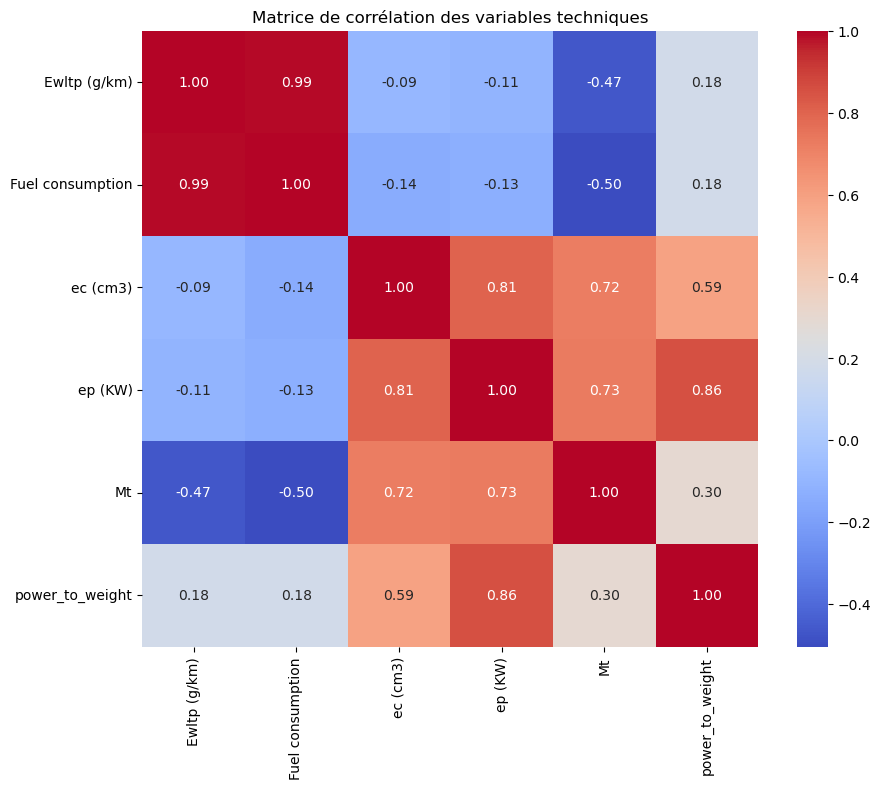

In [28]:
# Nettoyage éventuel des noms de colonnes
df.columns = df.columns.str.strip()


# Ajout de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']

# Sélection des colonnes à corréler
colonnes_corr = ['Ewltp (g/km)', 'Fuel consumption', 'ec (cm3)', 'ep (KW)', 'Mt', 'power_to_weight']
df_corr = df[colonnes_corr].copy()

# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matrice de corrélation des variables techniques")
plt.show()